___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest the data to notebook

In [125]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [127]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [128]:
df.target.value_counts()#balanced

1    165
0    138
Name: target, dtype: int64

In [129]:
df["cp"]=df["cp"].replace({0: "typical angina" ,1: "atypical angina" , 2: "non-anginal pain" ,3: "asymptomatic"})
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,flat,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.2,upsloping,0,normal,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.2,upsloping,0,normal,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.4,upsloping,2,normal,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.2,upsloping,1,normal,0


# EDA

<AxesSubplot:>

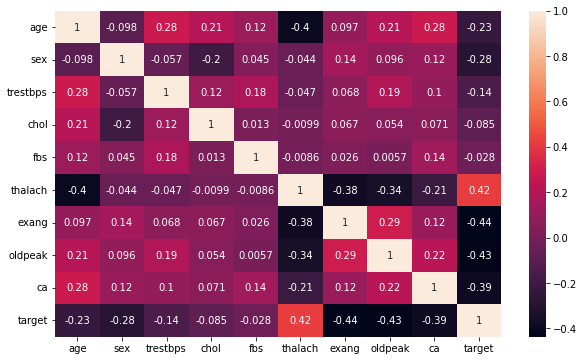

In [130]:
sns.heatmap(df.corr(),annot=True)

In [131]:
#df.drop(["target"],axis=1,inplace=True)
#df["target"]=pd.Series([1 if i==0 else 0 for i in df.target])


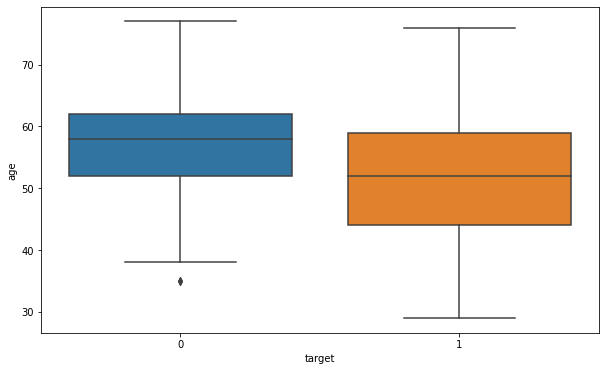

In [132]:
sns.boxplot(x='target',y='age',data=df); #1 hearth_stroke 0 not_hearth stroke 

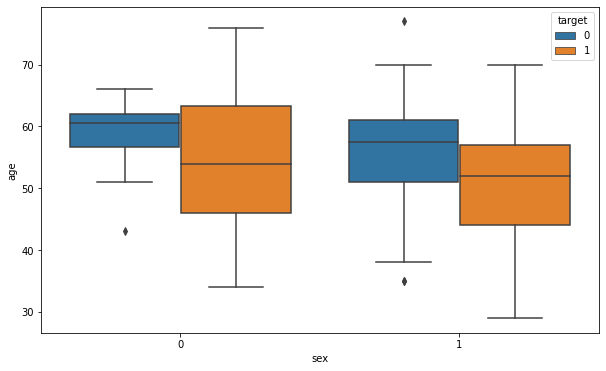

In [133]:
sns.boxplot(x='sex',y='age',hue="target",data=df);

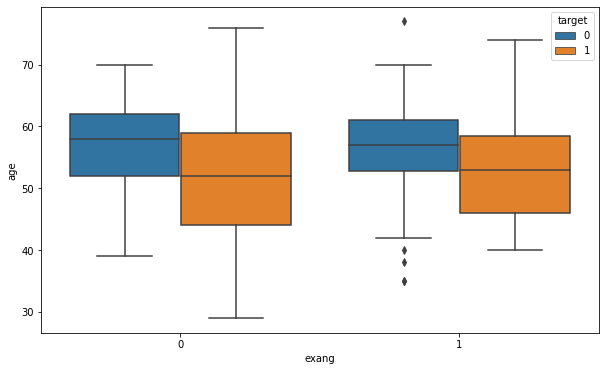

In [134]:
sns.boxplot(x='exang',y='age',hue="target",data=df);

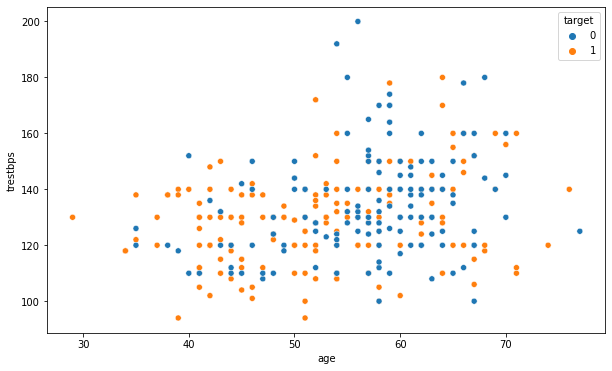

In [135]:
sns.scatterplot(x='age', y='trestbps', data=df, hue='target');#blood pressure 

<AxesSubplot:xlabel='oldpeak'>

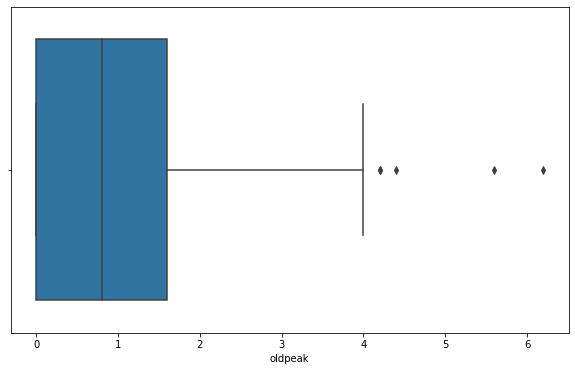

In [136]:
sns.boxplot(df.oldpeak) 

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

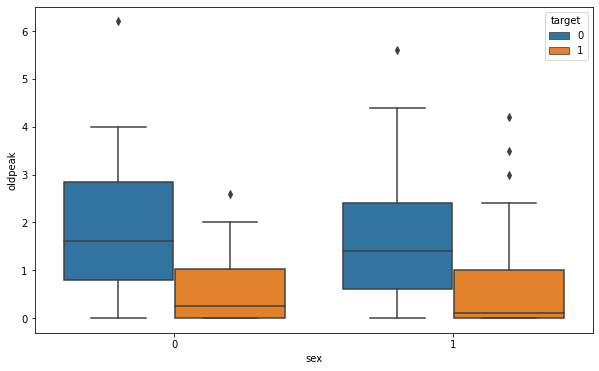

In [137]:
sns.boxplot(x="sex",y="oldpeak",hue="target",data=df)

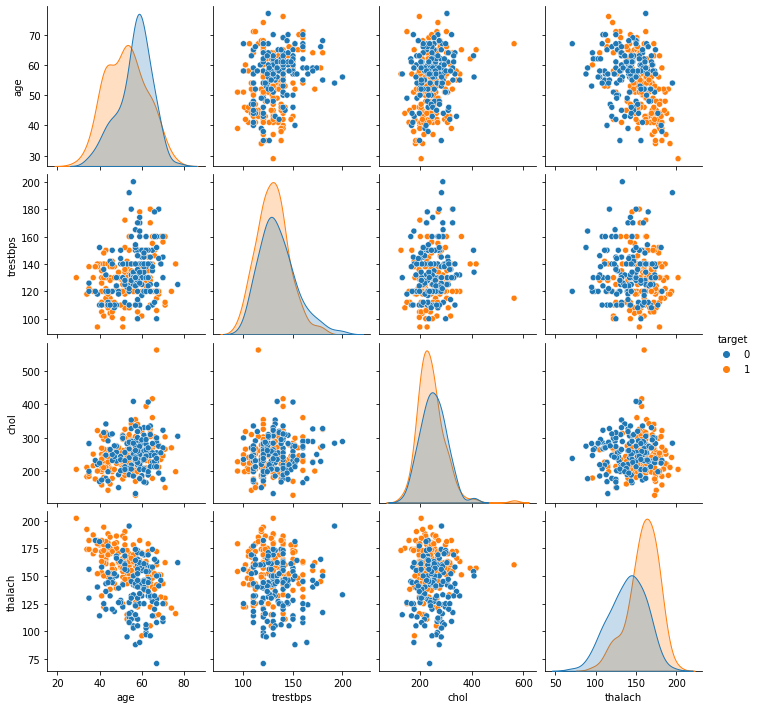

In [138]:
sns.pairplot(data=df[["age","trestbps","chol","thalach","target"]],hue="target")

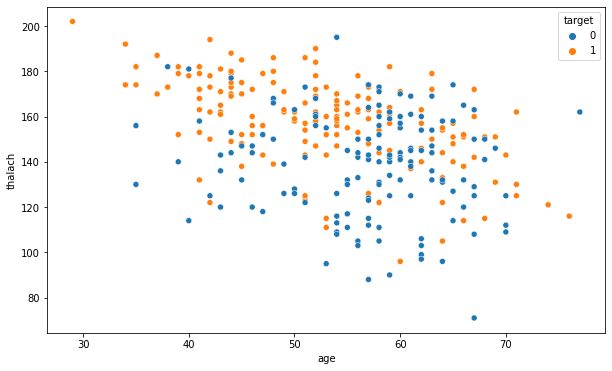

In [139]:
sns.scatterplot(x='age',y='thalach',hue="target",data=df);

In [140]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='age'>

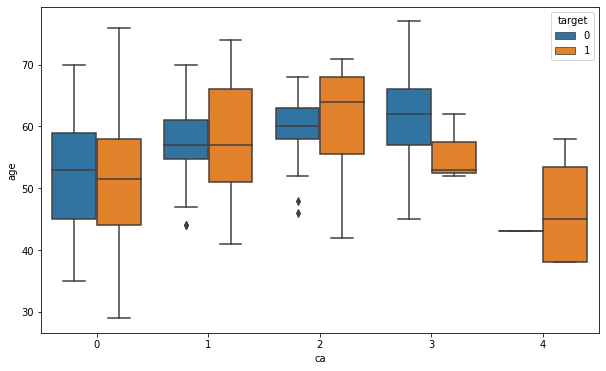

In [141]:
sns.boxplot(x="ca",y="age",hue="target",data=df)

In [142]:
df.thal.value_counts()

2         166
normal    117
1          18
0           2
Name: thal, dtype: int64

In [143]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,0,1,0,0,1


# Data Preprocessing

In [144]:
from sklearn.model_selection import train_test_split 

In [145]:
X=df.drop(["target"],axis=1)
y=df.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)


In [146]:
from sklearn.preprocessing import StandardScaler

scale=StandardScaler()

X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)


# Implement Logistic Regression and Evaluate

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
LSR_model=LogisticRegression()

In [149]:
LSR_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [150]:
y_pred=LSR_model.predict(X_test_scaled)
LSR_model.score(X_test_scaled,y_test)

0.8360655737704918

In [151]:
y_pred_proba = LSR_model.predict_proba(X_test_scaled)

In [152]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,target,pred,pred_proba
16,58,0,120,340,0,172,0,0.0,0,0,...,0,0,1,0,0,1,0,1,1,0.994383
209,59,1,140,177,0,162,1,0.0,1,0,...,0,0,1,0,0,0,1,0,0,0.207254
91,57,1,132,207,0,168,1,0.0,0,0,...,0,0,1,0,0,0,1,1,0,0.413235
4,57,0,120,354,0,163,1,0.6,0,0,...,0,0,1,0,0,1,0,1,1,0.831669
178,43,1,120,177,0,120,1,2.5,0,0,...,0,1,0,1,0,0,1,0,0,0.042053
134,41,0,126,306,0,163,0,0.0,0,1,...,0,0,1,0,0,1,0,1,1,0.976044
13,64,1,110,211,0,144,1,1.8,0,0,...,0,1,0,1,0,1,0,1,1,0.565666
187,54,1,124,266,0,109,1,2.2,1,0,...,0,1,0,1,0,0,1,0,0,0.010664
268,54,1,122,286,0,116,1,3.2,2,0,...,0,1,0,1,0,1,0,0,0,0.013479
19,69,0,140,239,0,151,0,1.8,2,0,...,0,0,1,0,0,1,0,1,1,0.846192


In [153]:
from sklearn.metrics import classification_report , confusion_matrix

In [154]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [155]:
eval_metric(LSR_model, X_train_scaled, y_train, X_test_scaled, y_test)#good results but its can be better

Test_Set
[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 86  21]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.85      0.91      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# Cross Validation

In [156]:
from sklearn.model_selection import cross_validate

In [157]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.009995,0.003997,0.928571,0.928571,0.928571,0.920000
2,0.007997,0.004995,0.785714,0.785714,0.785714,0.760000
3,0.008995,0.006995,0.812500,0.928571,0.866667,0.833333
4,0.006995,0.005996,0.857143,0.857143,0.857143,0.833333
5,0.008996,0.005995,0.923077,0.857143,0.888889,0.875000
6,0.012991,0.006996,0.785714,0.846154,0.814815,0.791667
7,0.012991,0.003997,0.769231,0.769231,0.769231,0.750000
8,0.008995,0.003998,0.647059,0.846154,0.733333,0.666667
9,0.009994,0.005996,0.916667,0.846154,0.880000,0.875000
10,0.009994,0.003997,1.000000,1.000000,1.000000,1.000000


In [158]:
df_scores.loc[9,:]

fit_time          0.009994
score_time        0.005996
test_precision    0.916667
test_recall       0.846154
test_f1           0.880000
test_accuracy     0.875000
Name: 9, dtype: float64

In [159]:
df_scores.mean()[2:]

test_precision    0.842568
test_recall       0.866484
test_f1           0.852436
test_accuracy     0.830500
dtype: float64

In [160]:
eval_metric(LSR_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 86  21]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.85      0.91      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# GRID SEARCH

In [161]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [162]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"] #elastice gerek yok C parametresi logspace kullanılarak 
C = np.logspace(0, 10, 20)  # buradaki alpha parametresi,alpha parametresi ile ters orantılı çalışır c küçüldükçe uyguladığı regülarızasyon artar
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] #çoğunluk sınıfa daha fazla tahmin yaptırır model
#model 500 0 100 1 varsa direk tembellik edip 0 a kaçar sıfır sayısı çok fazla az olan sınıfa daha fazla tahmin yaptırıyoruz 
#balance bu işe yarıyor
#solver ise gradient disentlerin metodları büyük datalarda sag ve saga modeli hızlandırmak için seçilebilir 
#saga seçeceksem lasso kullanamam elastik

param_grid = {"penalty" : penalty,  #aynı şekilde verdik param gridi
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,    #default olarak 1 sınıfına göre hesaplama yapacak
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 yaparsak 0 için ayarlanır recall arttıracak şekilde ben ayarlamasını
                          #grid searcın istiyorum
                          n_jobs = -1)

In [163]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [164]:
grid_model.best_params_

{'C': 1.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

In [165]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 86  21]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.85      0.91      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [166]:
eval_metric(LSR_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 86  21]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.85      0.91      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [167]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

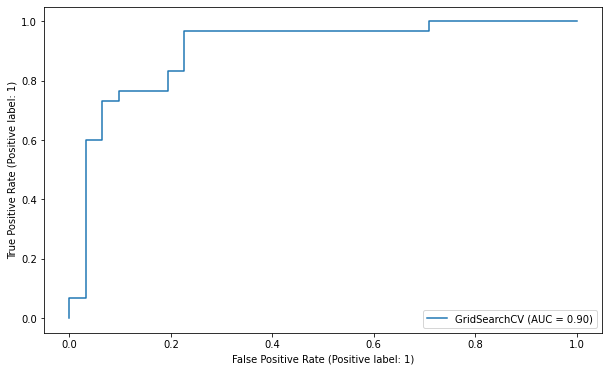

In [168]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

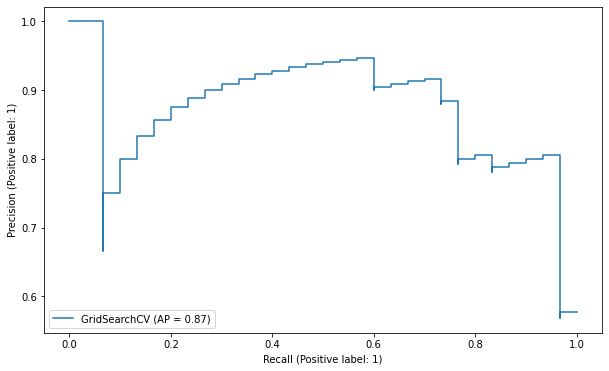

In [169]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test); #reality acullated thanks :) 

# Finding Best Threshold

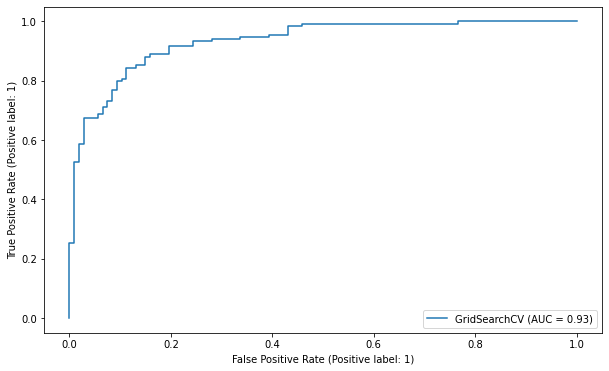

In [170]:
plot_roc_curve(grid_model,X_train_scaled,y_train)

In [171]:
y_pred_proba = LSR_model.predict_proba(X_train_scaled) #mutlaka train setinde tesbit etmem lazı test setindeki değerleri görüp
#bir model belirlemesini istemiyoruz burası önemli y train setinden aldığım probayı vericez 
roc_auc_score(y_train, y_pred_proba[:,1])

0.9338179300796123

In [172]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1]) #1 sınıfına ait olma olasılığını verince 

In [173]:
optimal_idx = np.argmax(tp_rate - fp_rate)  #optima index max numara hangisiyse index numarasını bize döndürür
optimal_threshold = thresholds[optimal_idx] #indeksi alıp thresholda verirsek bize en optimal değer verir 
optimal_threshold

0.6231344740282438

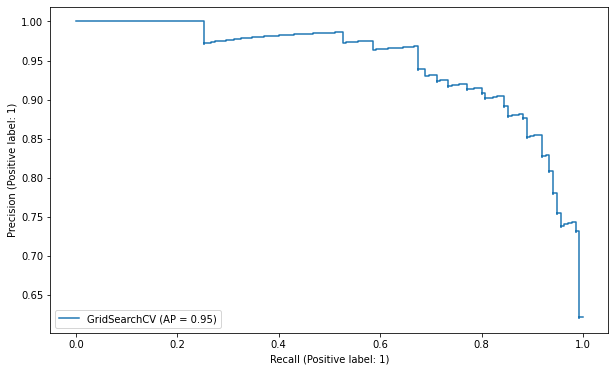

In [174]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);

In [175]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [176]:
print(confusion_matrix(y_test,y_pred2))            #after determined to best threshold   #progress achived thanks to trainers
print(classification_report(y_test,y_pred2))       #and adjusted on threshold all datas 

[[25  6]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [177]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2)) #it is provide us recall 

[[ 95  12]
 [ 21 114]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.90      0.84      0.87       135

    accuracy                           0.86       242
   macro avg       0.86      0.87      0.86       242
weighted avg       0.87      0.86      0.86       242



In [178]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[24  7]
 [ 3 27]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.79      0.90      0.84        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 86  21]
 [ 12 123]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       107
           1       0.85      0.91      0.88       135

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# Implement KNN and Evaluate

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [180]:
knn_model=KNeighborsClassifier()

In [181]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [182]:
y_pred=knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [183]:
knn_model.score(X_test_scaled,y_test)

0.819672131147541

In [184]:
y_pred_proba=knn_model.predict_proba(X_test_scaled)

In [185]:
pd.DataFrame(y_pred_proba)
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
13,1,0,0.4,0.6
270,0,0,0.2,0.8
279,0,0,0.2,0.8
19,1,1,0.8,0.2
206,0,0,0.0,1.0
12,1,1,1.0,0.0
255,0,0,0.0,1.0
221,0,0,0.0,1.0
198,0,0,0.2,0.8
89,1,1,0.8,0.2


# Model Performance on Classification Tasks

In [186]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [187]:
confusion_matrix(ypred,y_test)

array([[26,  6],
       [ 5, 24]], dtype=int64)

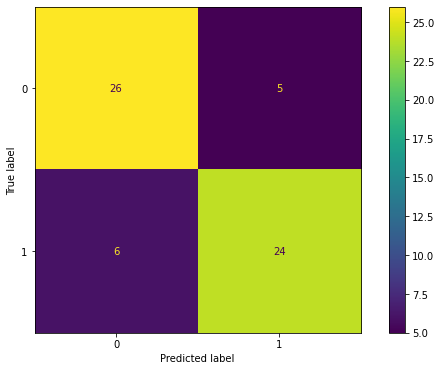

In [188]:
plot_confusion_matrix(knn_model,X_test_scaled,y_test)

In [189]:
print(confusion_matrix(y_test,y_pred),classification_report(y_test,ypred),end="")

[[26  5]
 [ 6 24]]               precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.83      0.80      0.81        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


In [190]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[26  5]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.83      0.80      0.81        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
[[ 91  16]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.88      0.87      0.88       135

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



# Elbow Method for Choosing Reasonable K Values

In [191]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [192]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

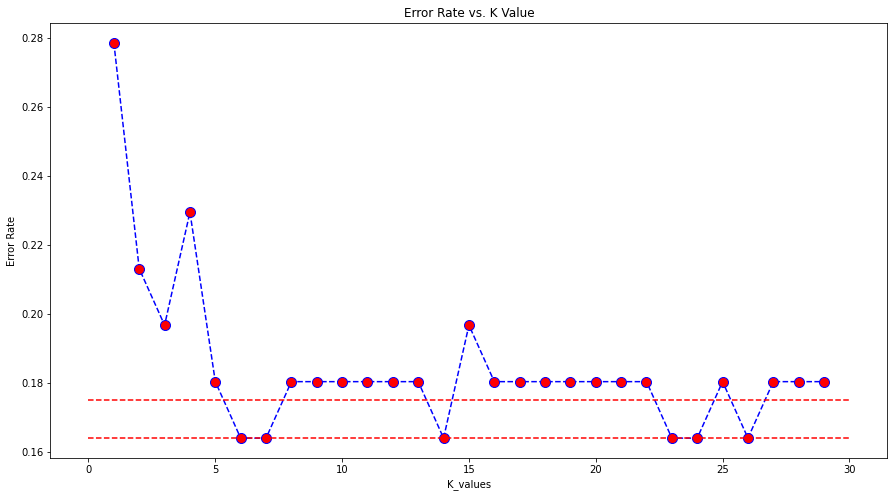

In [193]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

# Scores by Various K Values

In [201]:
knn = KNeighborsClassifier(n_neighbors=7)  # accuracy:0.84 -------> 16 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=7

Test_Set
[[26  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 90  17]
 [ 17 118]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.87      0.87      0.87       135

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [202]:
knn = KNeighborsClassifier(n_neighbors=23)   # accuracy:0.84 -------> 15 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=23\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=23

Test_Set
[[26  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.83      0.83      0.83        30

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Train_Set
[[ 88  19]
 [ 19 116]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       107
           1       0.86      0.86      0.86       135

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Cross Validate

In [199]:
model =KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.002001,0.057963,0.866667,0.928571,0.896552,0.880000
2,0.000999,0.007998,0.533333,0.571429,0.551724,0.480000
3,0.001001,0.007994,1.000000,0.928571,0.962963,0.958333
4,0.000999,0.005998,0.866667,0.928571,0.896552,0.875000
5,0.000000,0.005996,1.000000,0.785714,0.880000,0.875000
6,0.001000,0.005996,0.846154,0.846154,0.846154,0.833333
7,0.000000,0.005996,0.750000,0.692308,0.720000,0.708333
8,0.000000,0.005996,0.666667,0.769231,0.714286,0.666667
9,0.000000,0.005996,0.714286,0.769231,0.740741,0.708333
10,0.000999,0.006996,0.909091,0.769231,0.833333,0.833333


In [200]:
df_scores.mean()[2:]        # accuracy:0.78

test_precision    0.815286
test_recall       0.798901
test_f1           0.804230
test_accuracy     0.781833
dtype: float64

In [203]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[25  6]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.81      0.83      0.82        30

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
[[ 86  21]
 [ 18 117]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.85      0.87      0.86       135

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 